__Modeling of bank failures by FDIC__

In [2]:
import pandas as pd
import numpy as np
import time

import os
import functools
import math
import random
import sys, getopt
import sklearn

#sys.path.append("..")
import matplotlib.pyplot as plt
print('scikit-learn version:', sklearn.__version__)

scikit-learn version: 0.20.3


In [15]:
#List of column names we will plot. These are finance ratio
state_cols = ['log_TA','NI_to_TA', 'Equity_to_TA', 'NPL_to_TL', 'REO_to_TA', 
              'ALLL_to_TL', 'core_deposits_to_TA', 'brokered_deposits_to_TA', 
              'liquid_assets_to_TA', 'loss_provision_to_TL', 'NIM', 'assets_growth']

In [64]:
#Market Economic factor
all_MEVs = np.array(['term_spread',
                    'stock_mkt_growth',
                    'real_gdp_growth',
                    'unemployment_rate_change',
                    'treasury_yield_3m',
                    'bbb_spread',
                    'bbb_spread_change'])

MEV_cols = all_MEVs.tolist()

In [68]:
df_train[all_MEVs]

,,term_spread,stock_mkt_growth,real_gdp_growth,unemployment_rate_change,treasury_yield_3m,bbb_spread,bbb_spread_change
IDRSSD,date,,,,,,,
904957,2008-03-31,0.155788,-0.317435,-0.253927,0.859609,0.006692,0.894064,0.417366
202907,2011-06-30,0.897368,-0.132755,0.348841,0.202649,-0.956664,-0.324746,-0.095051
652874,2012-12-31,-0.400396,0.188968,-0.387875,-0.782792,-0.896455,0.081524,0.161157
9115,2003-03-31,0.433881,1.674053,0.951609,0.531129,-0.354567,-0.189323,-0.863677
3344611,2012-06-30,-0.585791,-0.510166,-0.521824,-0.125832,-0.896455,0.894064,0.417366
2560526,2009-03-31,1.082763,1.685831,-1.928282,3.158971,-0.836245,3.331682,-3.169554
12311,2002-12-31,0.433881,1.674053,0.951609,0.531129,-0.354567,-0.189323,-0.863677
2714570,2009-06-30,1.082763,1.685831,-1.928282,3.158971,-0.836245,3.331682,-3.169554
1001152,2008-03-31,0.155788,-0.317435,-0.253927,0.859609,0.006692,0.894064,0.417366


In [10]:
#read data
df_train = pd.read_hdf('Data/ML_FIN/data/df_train_FDIC_defaults_1Y.h5', key='df')
df_test = pd.read_hdf('Data/ML_FIN/data/df_test_FDIC_defaults_1Y.h5', key='df')

In [12]:
df_test.shape

(331, 44)

In [13]:
df_train.shape

(641, 44)

__Construct training and testing datasets for logistic regression__

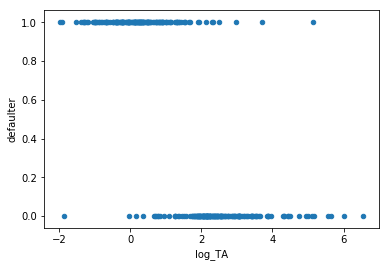

In [17]:
#Plotting log_TA (Natural log of Total Assets)
df_test.plot(x=state_cols[0], y='defaulter', kind='scatter')

In [28]:
X_train = df_train[state_cols].values #Use only the required columns

In [29]:
y_train = df_train.defaulter.values  #Get all the values from "defaulter" column 

In [30]:
y_train.shape

(641,)

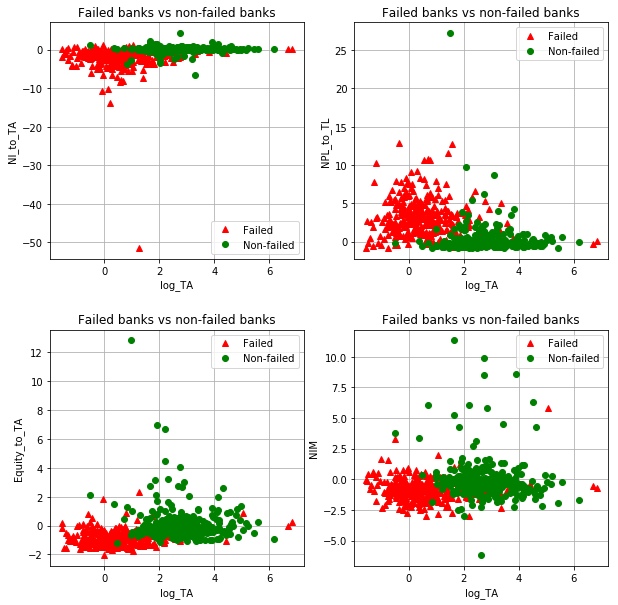

In [63]:
# Plot 4 scatter plots together

# log_TA / NI_to_TA  
# log_TA / NPL_to_TL
# log_TA / Equity_to_TA
# log_TA /ROA


f,axes=plt.subplots(2,2) #We want to fit 4 figures in a single plot. Hence, 2 rows and 2 columns are required
#it returns figure object and 4 axes (2,2) to control 4 figures

first_indx = [0, 0, 0, 0]
second_indx = [1, 3, 2, 10]
num_plots = 4

f.subplots_adjust(hspace=.3) #Controls the empty space in the graph
f.set_figheight(10.0)  #Sets the height of the figure
f.set_figwidth(10.0)   #Sets the width of the figure


for i in range(num_plots):
    if i % 2 == 0:
        first_axis = i // 2
        second_axis = 0
    else:
        first_axis = i // 2
        second_axis = 1
        
    
    #Plot all the values in X which has y as 1 ie defauters 
    axes[first_axis,second_axis].plot(X_train[y_train == 1.0, first_indx[i]], 
                                   X_train[y_train == 1.0, second_indx[i]], 'r^', label="Failed")
    #Plot all the values in X which has y as 0 ie non-defaulters
    axes[first_axis,second_axis].plot(X_train[y_train == 0.0, first_indx[i]], 
                                   X_train[y_train == 0.0, second_indx[i]], 'go',label="Non-failed") 
    axes[first_axis,second_axis].legend() #Displays the labels defined in the subplots
    axes[first_axis,second_axis].set_xlabel('%s' % state_cols[first_indx[i]]) #Fetching x label from state_cols list(always log_TA)
    axes[first_axis,second_axis].set_ylabel('%s' % state_cols[second_indx[i]]) #Fetching y label from state_cols list
    axes[first_axis,second_axis].set_title('Failed banks vs non-failed banks') #Sets the title of subplot
    axes[first_axis,second_axis].grid(True) #Adds the gridlines in the plot


In [36]:
axes.shape

(2, 2)

In [39]:
axes[first_axis,second_axis].legend()

__Logistic Regression with Tensorflow__

In [71]:
# Setup inputs and expeced outputs for Logistic Regression using Tensorflow
cols = state_cols + MEV_cols  #Both finance ratios and Market Economic factors will be considered

# inputs to Logistic Regression
X_trainTf = df_train[cols].values
X_testTf = df_test[cols].values


# add constant columns to both, X0=1
X_trainTf = np.hstack((np.ones((X_trainTf.shape[0], 1)), X_trainTf))
X_testTf = np.hstack((np.ones((X_testTf.shape[0], 1)), X_testTf))

# expectd outputs:
y_trainTf = df_train.defaulter.astype('int').values.reshape(-1,1)
y_testTf = df_test.defaulter.astype('int').values.reshape(-1,1)

In [72]:
print('Unique values to predict:', np.unique(y_trainTf))
print('Number of samples to train on:', y_trainTf.shape[0])
print('Number of samples to test on:', y_testTf.shape[0])

Unique values to predict: [0 1]
Number of samples to train on: 641
Number of samples to test on: 331


In [73]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [74]:
#To be used during mini batch training
def random_batch(X_train, y_train, batch_size):
    np.random.seed(42)
    rnd_indices = np.random.randint(0, len(X_train), batch_size) 
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

### Build Logistic Regression TF model

**instructions**

in tensorflow create: 
 - placeholder for inputs called 'X' 
 - placeholder for inputs called 'y'
 - variable for model parameters called 'theta', initialized with theta_init

loss function: use log loss
optimizer: use Gradient Descent optimizer

In [75]:
import tensorflow as tf

C:\Users\Priyam\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [76]:
# define the model
reset_graph()
n_inputs = X_trainTf.shape[1] #no. of features
learning_rate = 0.01
theta_init = tf.random_uniform([n_inputs, 1], -1.0, 1.0, seed=42) #Returns uniformly distributed values between 1,-1 of the shape (n_inputs,1)

# build Logistic Regression model using Tensorflow
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(theta_init, name="theta")

logits=tf.matmul(X,theta) #X and theta multiplication and summation completed
y_proba = tf.sigmoid(logits) # 1 / (1 + tf.exp(-logits)) Taking sigmoid

# uses epsilon = 1e-7 by default to regularize the log function
loss = tf.losses.log_loss(y, y_proba, epsilon=1e-07)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# uses epsilon = 1e-7 by default to regularize the log function
loss = tf.losses.log_loss(y, y_proba, epsilon=1e-07) #Epsilon added to avoid the log(0)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()


### Train Logistic Regression TF model
__Instructions__

Use random_batch() function to grab batches from X_trainTf and y_trainTf.
Once the model is trained evaluate it based on X_testTf and y_testTf.
The __y_proba_val__ should be assigned the result of the evaluation on test dataset

In [78]:
n_epochs = 1001
batch_size = 50
num_rec = X_trainTf.shape[0]
n_batches = int(np.ceil(num_rec / batch_size))

with tf.Session() as sess:
    for epoch in range(n_epochs):
        sess.run(init)
        X_trainTf_batch, y_trainTf_batch = random_batch(X_trainTf, y_trainTf, batch_size)
        sess.run([optimizer, loss], feed_dict={X: X_trainTf_batch, y: y_trainTf_batch})
        
    y_proba_val = sess.run(y_proba, feed_dict={X: X_testTf})

In [81]:
# predictions
threshold = 0.5
y_pred = (y_proba_val >= threshold) #Returns true or false. Check by printing y_pred
print(np.sum(y_pred)) #gives total number of defaulters predicted in test data


171


In [82]:
y_pred.shape

(331, 1)

In [84]:
y_pred.squeeze().shape

(331,)

precision:  0.8070175438596491
recall:  0.8571428571428571
AUC score =  0.9004384362440627
roc_auc =  0.9004384362440627
KS_test =  0.6943734015345269


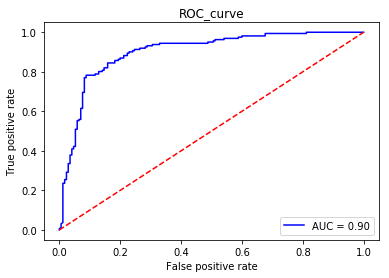

In [86]:
# evaluate precision, recall, and AUC

auc_score = 0.
ks = 0.
roc_auc = 0.
recall = 0.
precision = 0.

from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
if y_proba_val.shape == y_testTf.shape:
    precision = precision_score(y_testTf, y_pred)
    recall = recall_score(y_testTf, y_pred)
    auc_score = metrics.roc_auc_score(y_testTf, y_proba_val)
    fpr, tpr, threshold = metrics.roc_curve(y_testTf, y_proba_val, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    ks = np.max(tpr - fpr)

    print('precision: ', precision)
    print('recall: ', recall)
    print('AUC score = ', auc_score)
    print('roc_auc = ', roc_auc)
    print('KS_test = ', ks)

    try:
        plt.title('ROC_curve')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1], [0,1], 'r--')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.savefig('ROC_curve_TF.png')
        plt.show()
    except:
        pass

### Neural Network with Tensorflow

In [114]:
cols = state_cols + MEV_cols
n_inputs = len(cols)

# inputs 
X_trainTf = df_train[cols].values
X_testTf = df_test[cols].values

# outputs 
y_trainTf = df_train['defaulter'].astype('int').values.reshape(-1,)
y_testTf = df_test['defaulter'].astype('int').values.reshape(-1,)

In [115]:
y_trainTf.shape

(641,)

In [116]:
import numpy as np
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name): #Every layer will have a different scope name
        tf.set_random_seed(42)
        n_inputs=int(X.get_shape()[1]) #Number of input neurons
        stddev=2/np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev) #intialise weights with standard deviation of 2/sqrt(number of input neurons). Mean by default is zero
        W=tf.Variable(init,name="kernel")
        b=tf.Variable(tf.zeros([n_neurons]),name="bias")
        Z=tf.matmul(X,W)+b
        if activation is not None:
            return activation(Z)
        else:
            return Z

### Construct Neural Network
__Instructions__ <br>
Implement Neural Network with two hidden layers. The number of nodes in the first and the second hidden layers is n_hidden1 and n_hidden2 correspondingly. Use neuron_layer() function to construct neural network layers.

Use ReLU activation function for hidden layers
The output layer has n_outputs and does not have an activation function
Use sparse softmax cross-entropy with logits as a loss function

In [121]:
n_hidden1 = 20
n_hidden2 = 10
n_outputs = 2 # binary classification (defaulted, not defaulted bank) 
#... Because we will be using softmax loss function later, we are considering two neurons for our code: https://stats.stackexchange.com/questions/207049/neural-network-for-binary-classification-use-1-or-2-output-neurons
#we could have also used tf.nn.sigmoid_cross_entropy_with_logits. We would have to change the the output placeholder and few other places as well: https://www.kaggle.com/autuanliuyc/logistic-regression-with-tensorflow

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None,), name="y")


In [118]:
#Now lets design the neural network
layer_1 = neuron_layer(X, n_hidden1, "layer_1", tf.nn.relu) #Using Relu activation for all layers except last
layer_2 = neuron_layer(layer_1, n_hidden2, "layer_2", tf.nn.relu)
logits = neuron_layer(layer_2, n_outputs, "logits")
entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss = tf.reduce_mean(entropy)

init = tf.global_variables_initializer()

### Train Neural Network
__Instructions__<br> Train neural network passing batches of inputs of size batch_size, which predicts bank defaults / non-defaults. Once the network is trained, evaluate accuracy using X_testTf, y_testTf

In [119]:
learning_rate = 0.05
n_epochs = 400
batch_size = 50
num_rec = X_trainTf.shape[0]
n_batches = int(np.ceil(num_rec / batch_size))
acc_test = 0. #  assign the result of accuracy testing to this variable

In [120]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(init)
    for i in range(n_epochs):
        X_trainTf_batch, y_trainTf_batch = random_batch(X_trainTf, y_trainTf, batch_size)
        sess.run([optimizer, loss], feed_dict={X: X_trainTf_batch, y: y_trainTf_batch})
    
    _, loss, logits = sess.run([optimizer, loss, logits], feed_dict={X: X_testTf, y: y_testTf})
    preds = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(preds, 1), y_testTf)
    acc_test = sess.run(tf.reduce_sum(tf.cast(correct_preds, tf.float32))) / len(y_testTf)